In [1]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Dense, SimpleRNN, LSTM, Bidirectional
from keras.callbacks import EarlyStopping

In [2]:
max_features = 10000 
maxlen = 500  

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features,  skip_top=20)

input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

early_stopping_callback = EarlyStopping(monitor='val_acc', patience=2, restore_best_weights=True)

# SimpleRNN

In [3]:
model_v1 = Sequential([
    Embedding(max_features, 32),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
])

model_v1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history_v1 = model_v1.fit(input_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping_callback])

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 46ms/step - acc: 0.5429 - loss: 0.6815 - val_acc: 0.5462 - val_loss: 0.8314
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 47ms/step - acc: 0.7645 - loss: 0.4886 - val_acc: 0.8084 - val_loss: 0.4373
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - acc: 0.8602 - loss: 0.3328 - val_acc: 0.8494 - val_loss: 0.3814
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - acc: 0.8983 - loss: 0.2486 - val_acc: 0.7796 - val_loss: 0.5062
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - acc: 0.9293 - loss: 0.1835 - val_acc: 0.8018 - val_loss: 0.5023


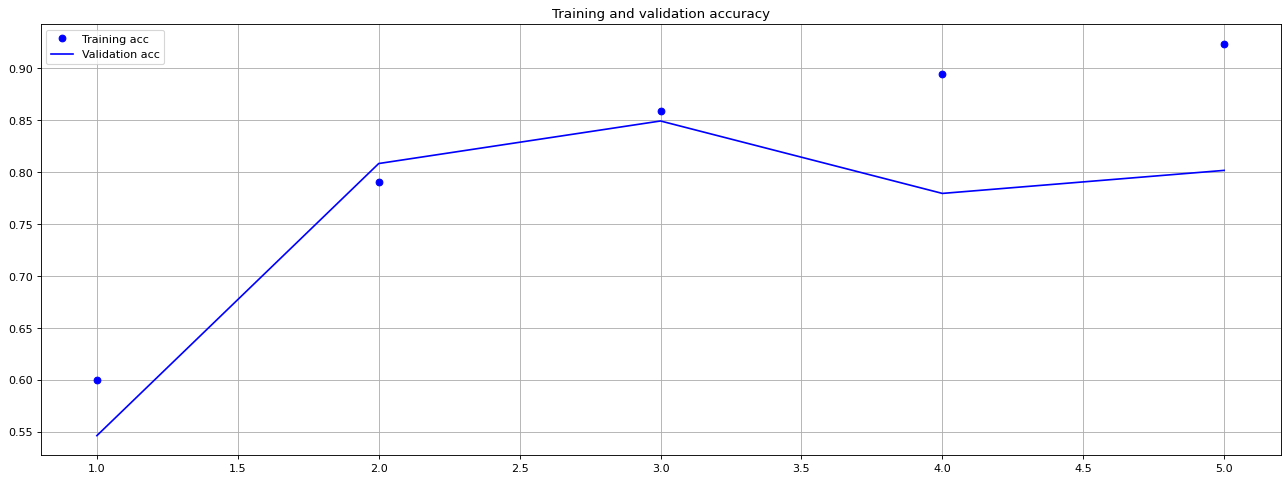

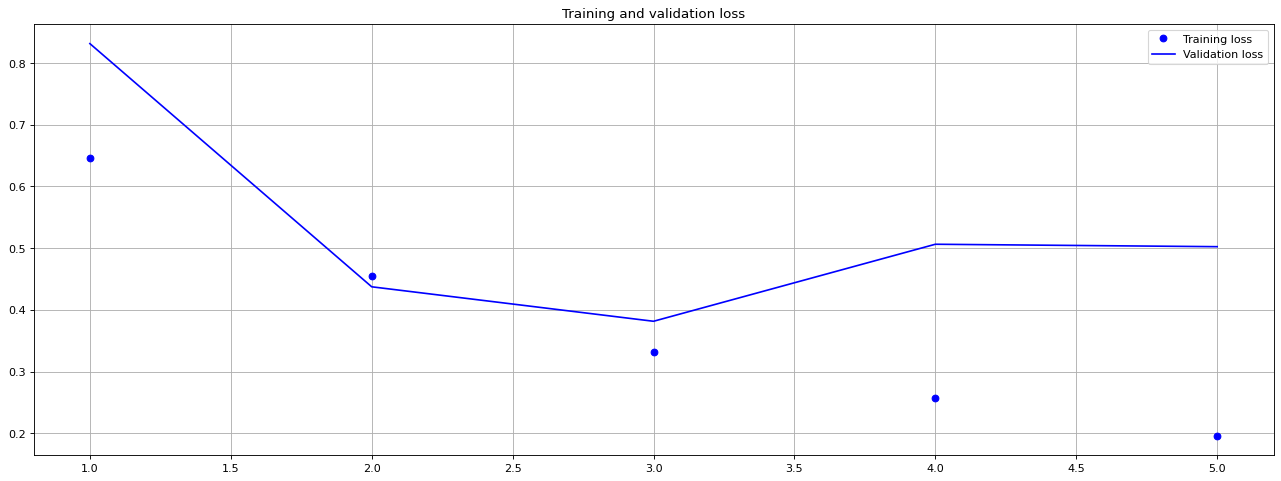

In [4]:
acc = history_v1.history['acc']
val_acc = history_v1.history['val_acc']

loss = history_v1.history['loss']
val_loss = history_v1.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(20, 7), dpi=80)
plt.grid(True)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")

plt.title("Training and validation accuracy")
plt.legend()

plt.figure(figsize=(20, 7), dpi=80)
plt.grid(True)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss") 
plt.title("Training and validation loss")

plt.legend()
plt.show()

In [5]:
test_loss, test_acc_v1 = model_v1.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc_v1))

782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - acc: 0.8442 - loss: 0.3844
Test Loss: 0.3835841715335846
Test Accuracy: 0.8472399711608887


# LSTM

In [6]:
model_v2 = Sequential([
    Embedding(max_features, 32),
    LSTM(32),
    Dense(1, activation='sigmoid')
])

model_v2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history_v2 = model_v2.fit(input_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping_callback])

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 72ms/step - acc: 0.6304 - loss: 0.6197 - val_acc: 0.8308 - val_loss: 0.3885
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 71ms/step - acc: 0.8308 - loss: 0.3900 - val_acc: 0.8690 - val_loss: 0.3227
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - acc: 0.8781 - loss: 0.3073 - val_acc: 0.8774 - val_loss: 0.2920
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 71ms/step - acc: 0.9005 - loss: 0.2566 - val_acc: 0.8646 - val_loss: 0.3308
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - acc: 0.9180 - loss: 0.2158 - val_acc: 0.8888 - val_loss: 0.3110
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 71ms/step - acc: 0.9340 - loss: 0.1836 - val_acc: 0.8892 - val_loss: 0.2816
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - acc: 0.9402 - loss: 0.1674 - val_acc: 0.8858 - val_loss: 0.2862
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 71ms/step - acc: 0.9483 - loss: 0.1485 - val_acc: 0.8832 - val_loss: 0.3311


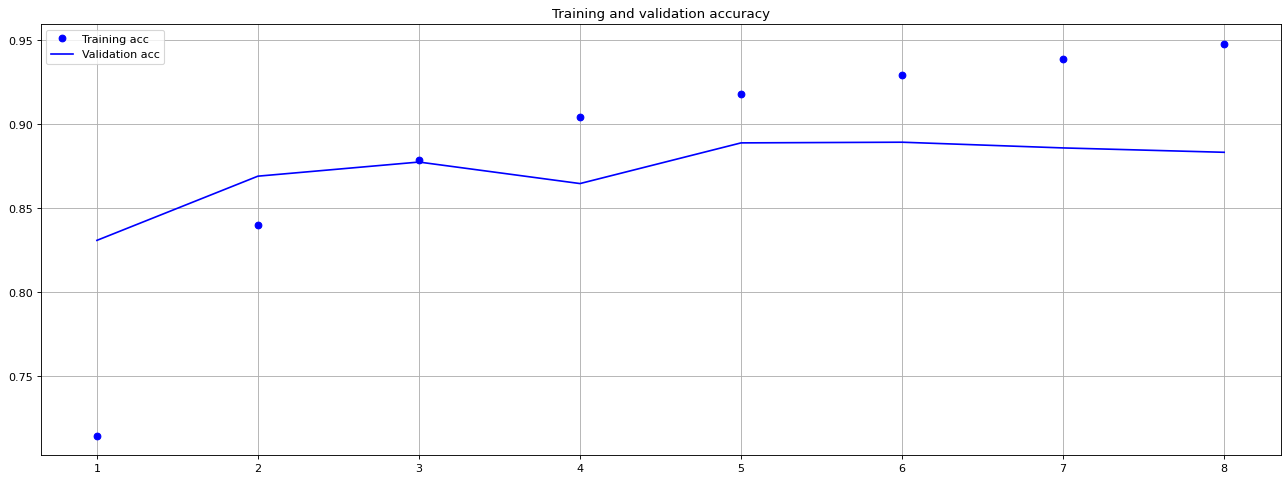

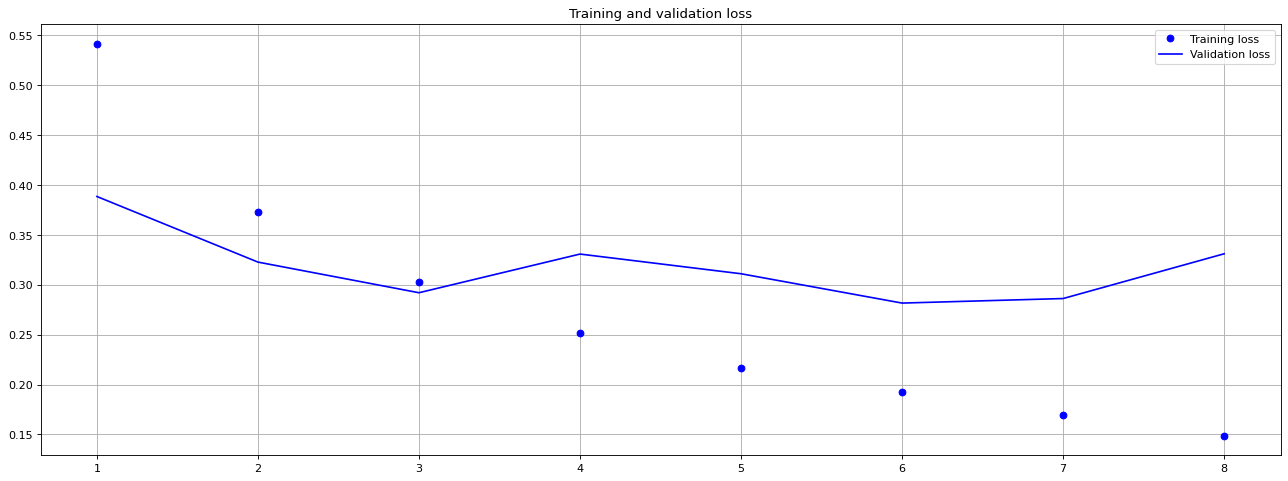

In [7]:
acc = history_v2.history['acc']
val_acc = history_v2.history['val_acc']

loss = history_v2.history['loss']
val_loss = history_v2.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(20, 7), dpi=80)
plt.grid(True)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")

plt.title("Training and validation accuracy")
plt.legend()

plt.figure(figsize=(20, 7), dpi=80)
plt.grid(True)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss") 
plt.title("Training and validation loss")

plt.legend()
plt.show()

In [8]:
test_loss, test_acc_v2 = model_v2.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc_v2))

782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - acc: 0.8853 - loss: 0.2948
Test Loss: 0.2922424077987671
Test Accuracy: 0.8864399790763855


# BRNN

In [9]:
model_v3 = Sequential([
    Embedding(max_features, 32),
    Bidirectional(LSTM(32)),
    Dense(1, activation='sigmoid')
])

model_v3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history_v3 = model_v3.fit(input_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 87ms/step - acc: 0.6193 - loss: 0.6341 - val_acc: 0.8430 - val_loss: 0.3758
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - acc: 0.8229 - loss: 0.4057 - val_acc: 0.8520 - val_loss: 0.3477
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 88ms/step - acc: 0.8751 - loss: 0.3129 - val_acc: 0.8734 - val_loss: 0.3187
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - acc: 0.9040 - loss: 0.2516 - val_acc: 0.8870 - val_loss: 0.2844
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - acc: 0.9235 - loss: 0.2072 - val_acc: 0.8824 - val_loss: 0.2941


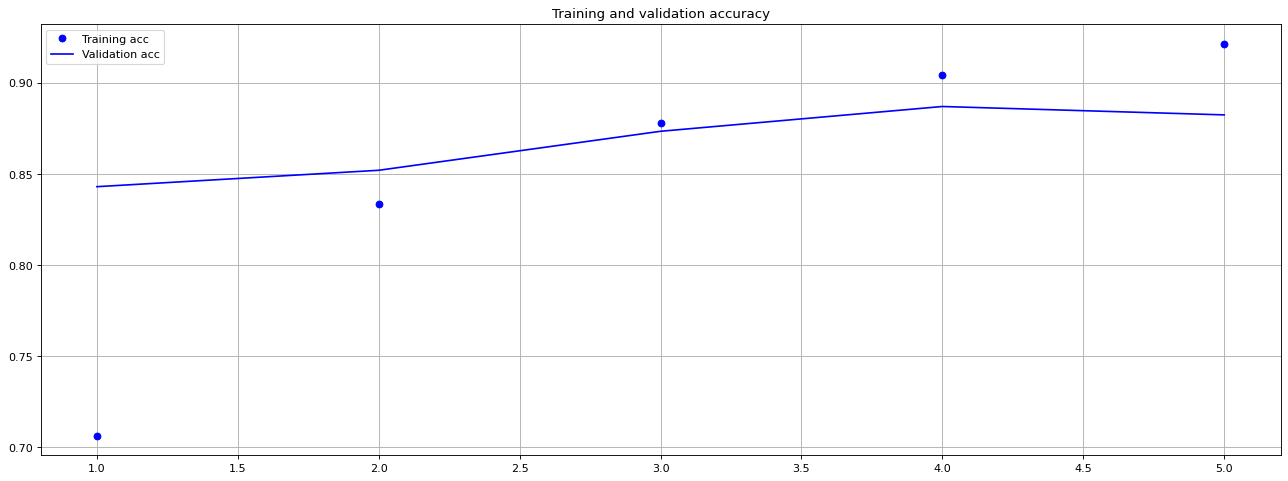

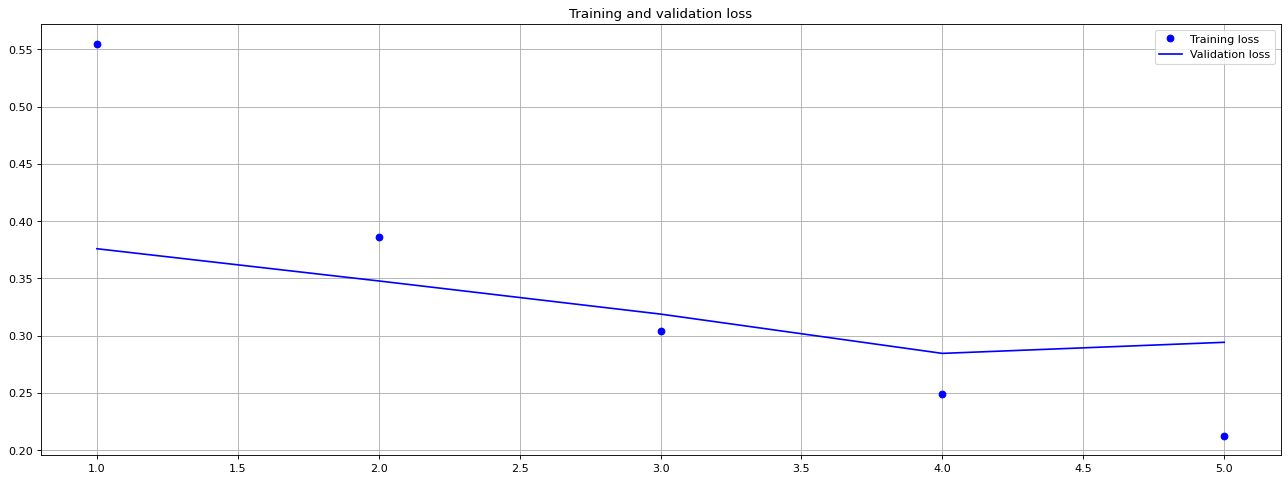

In [10]:
acc = history_v3.history['acc']
val_acc = history_v3.history['val_acc']

loss = history_v3.history['loss']
val_loss = history_v3.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(20, 7), dpi=80)
plt.grid(True)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")

plt.title("Training and validation accuracy")
plt.legend()

plt.figure(figsize=(20, 7), dpi=80)
plt.grid(True)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss") 
plt.title("Training and validation loss")

plt.legend()
plt.show()

In [11]:
test_loss, test_acc_v3 = model_v3.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc_v3))

782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - acc: 0.8783 - loss: 0.2987
Test Loss: 0.2943992018699646
Test Accuracy: 0.8802400231361389


# Deep RNN

In [12]:
model_v4 = Sequential([
    Embedding(max_features, 32),
    Bidirectional(LSTM(32, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(1, activation='sigmoid')
])

model_v4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history_v4 = model_v4.fit(input_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 126s 194ms/step - acc: 0.6045 - loss: 0.6314 - val_acc: 0.8298 - val_loss: 0.3898
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 117s 186ms/step - acc: 0.8294 - loss: 0.3912 - val_acc: 0.8484 - val_loss: 0.3667
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 111s 178ms/step - acc: 0.8743 - loss: 0.3114 - val_acc: 0.8644 - val_loss: 0.3294
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 113s 181ms/step - acc: 0.8969 - loss: 0.2605 - val_acc: 0.8676 - val_loss: 0.3078
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 113s 182ms/step - acc: 0.9174 - loss: 0.2203 - val_acc: 0.8752 - val_loss: 0.2961


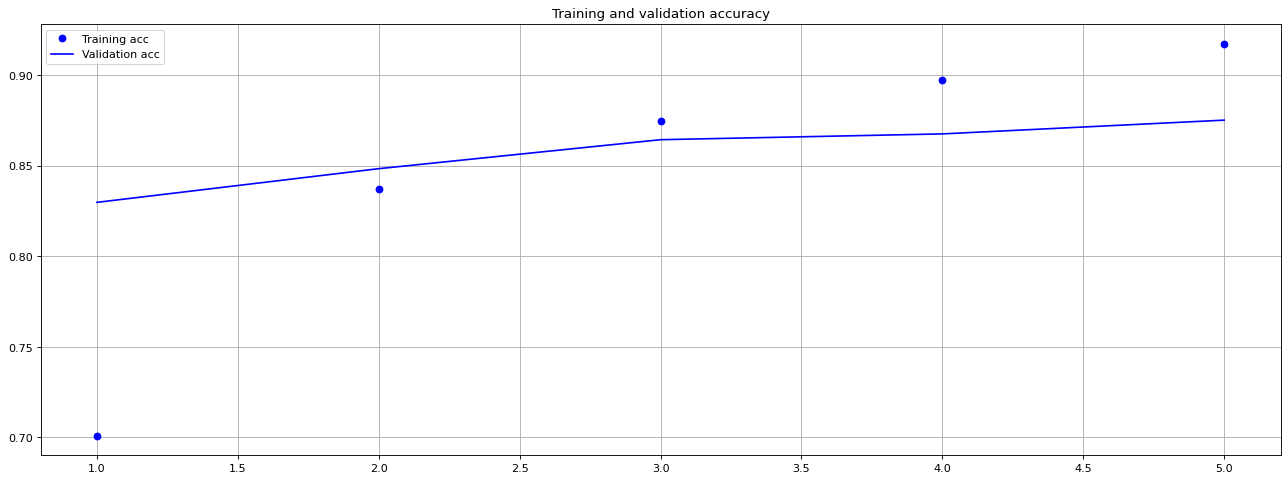

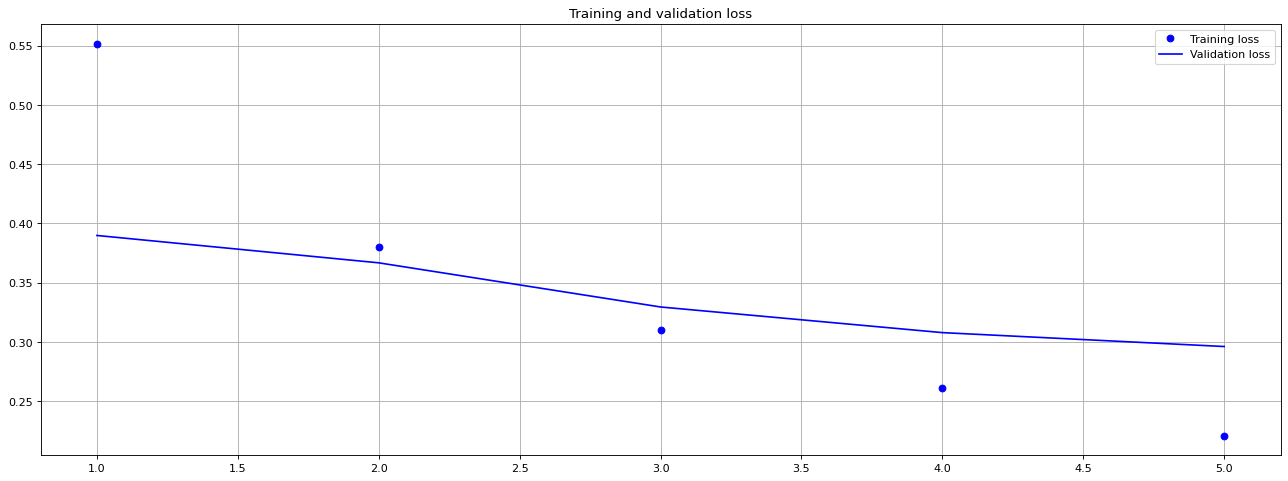

In [13]:
acc = history_v4.history['acc']
val_acc = history_v4.history['val_acc']

loss = history_v4.history['loss']
val_loss = history_v4.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(20, 7), dpi=80)
plt.grid(True)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")

plt.title("Training and validation accuracy")
plt.legend()

plt.figure(figsize=(20, 7), dpi=80)
plt.grid(True)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss") 
plt.title("Training and validation loss")

plt.legend()
plt.show()

In [14]:
test_loss, test_acc_v4 = model_v4.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc_v4))

782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - acc: 0.8782 - loss: 0.3019
Test Loss: 0.29841071367263794
Test Accuracy: 0.8778799772262573


# Висновки

In [15]:
print('Test Accuracy for Simple RNN: {}'.format(test_acc_v1))
print('Test Accuracy for LSTM: {}'.format(test_acc_v2))
print('Test Accuracy for BRNN: {}'.format(test_acc_v3))
print('Test Accuracy for Deep RNN: {}'.format(test_acc_v4))

Test Accuracy for Simple RNN: 0.8472399711608887
Test Accuracy for LSTM: 0.8864399790763855
Test Accuracy for BRNN: 0.8802400231361389
Test Accuracy for Deep RNN: 0.8778799772262573


LSTM, BRNN та Deep RNN показують більш високі результати у порівнянні з Simple RNN. Проте, BRNN вимагає трохи більше часу і показує трохи гіршу точність у порівнянні з LSTM. Також слід зазначити, що Deep RNN вимагають значно більше часу для навчання при менших показниках точності. З точки зору витрати часу на навчання і отриманих результатів, найефективнішим вибором для данної задачі буде LSTM.